In [29]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = np.array((3.29,3.26,3.3,3.3,3.23,3.27,3.23,3.18,3.22,3.29,3.33,3.32,3.32,3.38,3.44,3.38,3.41,3.46,3.39,3.42,3.46,3.44,3.47,3.43,3.41,3.4,3.42,3.37,3.66,3.66,
                 3.58,3.6,3.57,3.57,3.59,3.56,3.55,3.6,3.61,3.66))
df = pd.DataFrame(data, columns = ['Xbar'])
# Inspect the dataset
df.head()

,Xbar
0,3.29
1,3.26
2,3.30
3,3.30
4,3.23


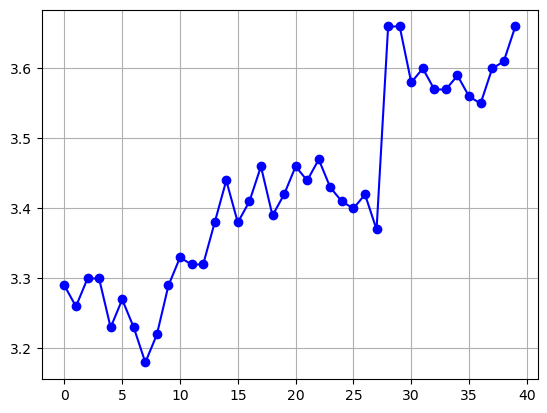

In [30]:
# Plot the data first
plt.plot(df, color='b', linestyle='-', marker='o')
plt.grid()
plt.show()

Runs test p-value = 0.000


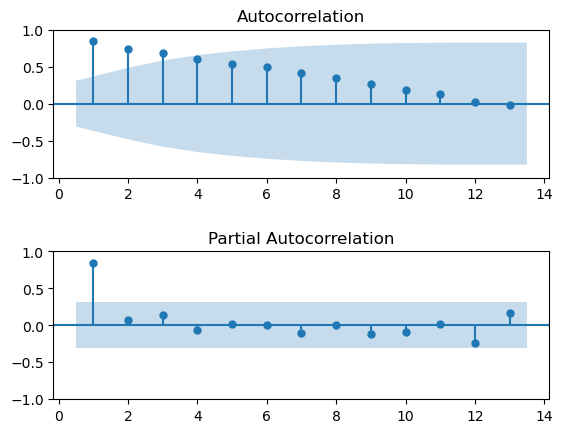

In [31]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(df['Xbar'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(df['Xbar'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(df['Xbar'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()


Shapiro-Wilk test p-value = 0.099


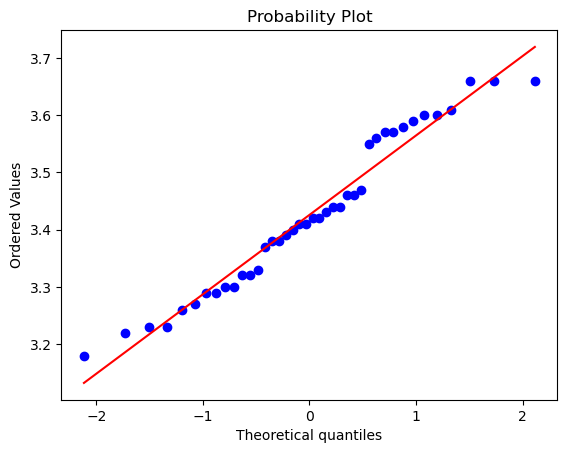

In [32]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(df['Xbar'])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(df['Xbar'], dist="norm", plot=plt)
plt.show()

In [33]:
df['lag1'] = df['Xbar'].shift(1)
df['week']=np.arange(1,41,1)

# and split the dataset into regressors and target
X = df.iloc[1:, 1:]
y = df.iloc[1:, 0]

In [34]:
import qda
stepwise = qda.StepwiseRegression(add_constant = True, direction = 'both', alpha_to_enter = 0.15, alpha_to_remove = 0.15)

# Fit the model
model = stepwise.fit(y, X)

Stepwise Regression

######################################
### Step 1
-------------------
Forward Selection

COEFFICIENTS
------------
 Term   Coef    P-Value
const 3.2007 2.8157e-54
 week 0.0109 2.0371e-15

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.0586 0.8215     0.8167

######################################
### Step 2
-------------------
Forward Selection

COEFFICIENTS
------------
 Term   Coef  P-Value
const 1.7971   0.0005
 week 0.0063   0.0008
 lag1 0.4387   0.0049

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.0531 0.8571     0.8492
-------------------
Backward Elimination

No predictor removed.

######################################
### Step 3
-------------------
Forward Selection
All predictors have been included in the model. Exiting stepwise.
-------------------


In [35]:
results = model.model_fit
qda.summary(results)

REGRESSION EQUATION
-------------------
Xbar =  + 1.797 const + 0.006 week + 0.439 lag1

COEFFICIENTS
------------
 Term   Coef  SE Coef  T-Value  P-Value
const 1.7971   0.4689   3.8330   0.0005
 week 0.0063   0.0017   3.6718   0.0008
 lag1 0.4387   0.1464   2.9959   0.0049

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.0531 0.8571     0.8492

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS  F-Value    P-Value
Regression  2.0  0.6102  0.3051 108.0056 6.1361e-16
     const  1.0  0.0415  0.0415  14.6921 4.8930e-04
      week  1.0  0.0381  0.0381  13.4824 7.7599e-04
      lag1  1.0  0.0254  0.0254   8.9756 4.9292e-03
     Error 36.0  0.1017  0.0028      NaN        NaN
     Total 38.0  0.7119     NaN      NaN        NaN


Shapiro-Wilk test p-value = 0.003


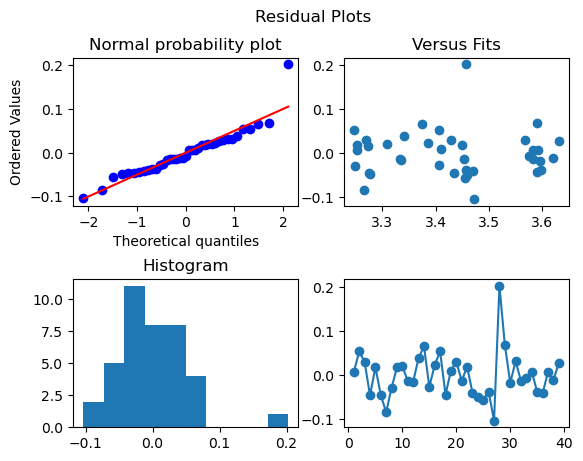

In [36]:
#Check on residuals
residuals = results.resid
fits = results.fittedvalues
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(residuals)
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the residuals
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(residuals, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(fits, residuals)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(residuals)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(residuals)+1), residuals, 'o-')
plt.show()

Runs test p-value on the residuals = 0.414


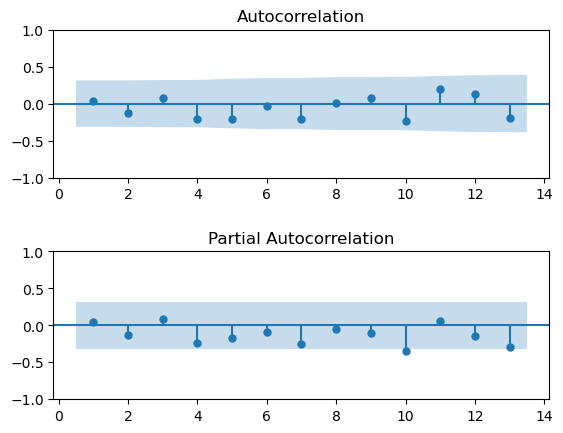

In [37]:
#RANDOMNESS OF FESIDUALS
_, pval_runs_res = runstest_1samp(residuals, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(residuals, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(residuals, lags = int(len(data)/3), zero=False, ax=ax[1], 
            method = 'ywm')
plt.show()

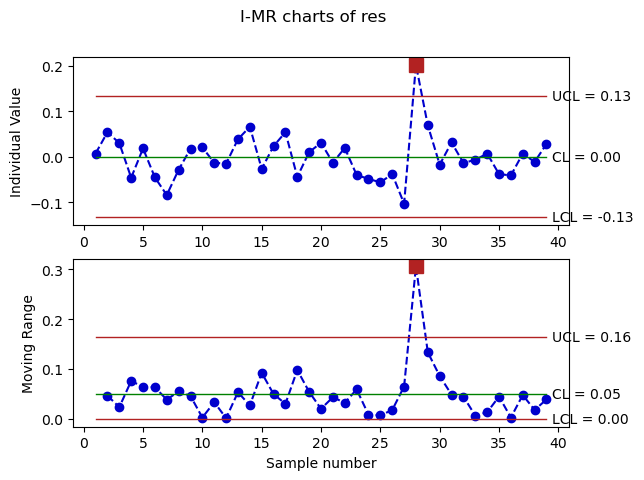

In [38]:
# Put the residuals in a dataframe
df_SCC = pd.DataFrame(results.resid, columns=['res'])

# Plot the IMR control chart
df_SCC_IMR = qda.ControlCharts.IMR(df_SCC, 'res')

>## point 2

In [39]:
df['dummy']=np.zeros(40)
df['dummy'][28]=1

c:\Users\Salam\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
import statsmodels.api as sm

x = df[['lag1', 'week', 'dummy']][1:]
x = sm.add_constant(x) 
y = df['Xbar'][1:]
model = sm.OLS(y, x).fit()

qda.summary(model)

REGRESSION EQUATION
-------------------
Xbar =  + 1.004 const + 0.687 lag1 + 0.003 week + 0.245 dummy

COEFFICIENTS
------------
 Term   Coef  SE Coef  T-Value    P-Value
const 1.0044   0.3671   2.7357 9.7072e-03
 lag1 0.6871   0.1147   5.9898 7.9629e-07
 week 0.0033   0.0013   2.4368 2.0044e-02
dummy 0.2450   0.0425   5.7689 1.5568e-06

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
0.0386 0.9268     0.9205

ANALYSIS OF VARIANCE
---------------------
    Source   DF  Adj SS  Adj MS  F-Value    P-Value
Regression  3.0  0.6598  0.2199 147.6621 6.2942e-20
     const  1.0  0.0111  0.0111   7.4842 9.7072e-03
      lag1  1.0  0.0534  0.0534  35.8780 7.9629e-07
      week  1.0  0.0088  0.0088   5.9379 2.0044e-02
     dummy  1.0  0.0496  0.0496  33.2807 1.5568e-06
     Error 35.0  0.0521  0.0015      NaN        NaN
     Total 38.0  0.7119     NaN      NaN        NaN


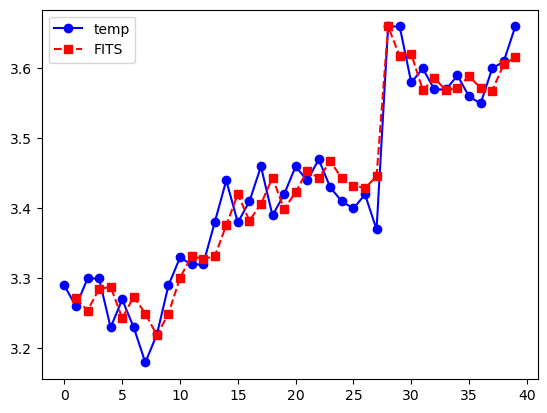

In [41]:
plt.plot(df['Xbar'], color='b', linestyle='-', marker='o', label='temp')
plt.plot(model.fittedvalues, color='r', linestyle='--', marker='s', label='FITS')
plt.legend()
plt.show()

Shapiro-Wilk test p-value on the residuals = 0.288


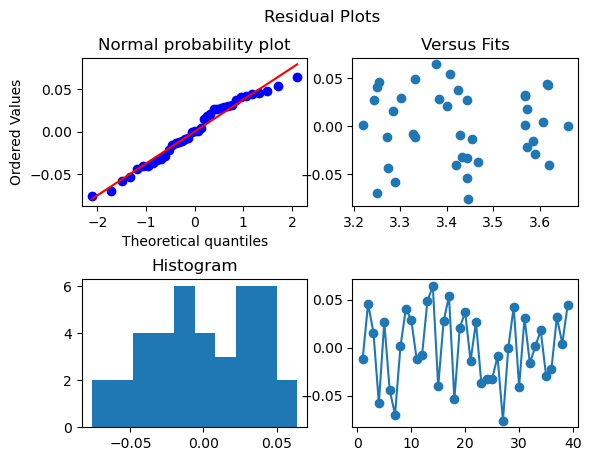

In [42]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(model.resid, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model.fittedvalues, model.resid)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(model.resid)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(model.resid)+1), model.resid, 'o-')
_, pval_SW_res = stats.shapiro(model.resid)
print('Shapiro-Wilk test p-value on the residuals = %.3f' % pval_SW_res)

Runs test p-value on the residuals = 0.598


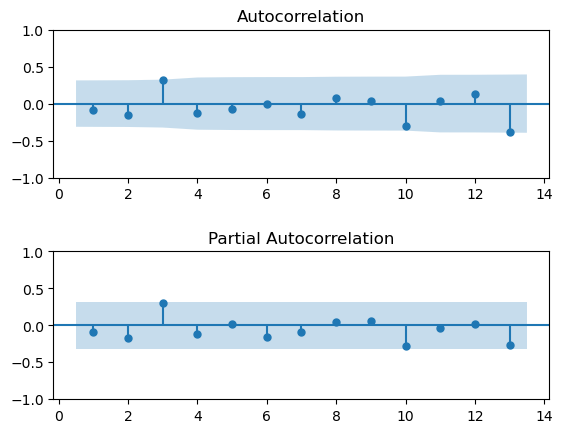

In [43]:
_, pval_runs_res = runstest_1samp(model.resid, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(model.resid, lags = int(len(data)/3), zero=False, ax=ax[1], 
            method = 'ywm')
plt.show()

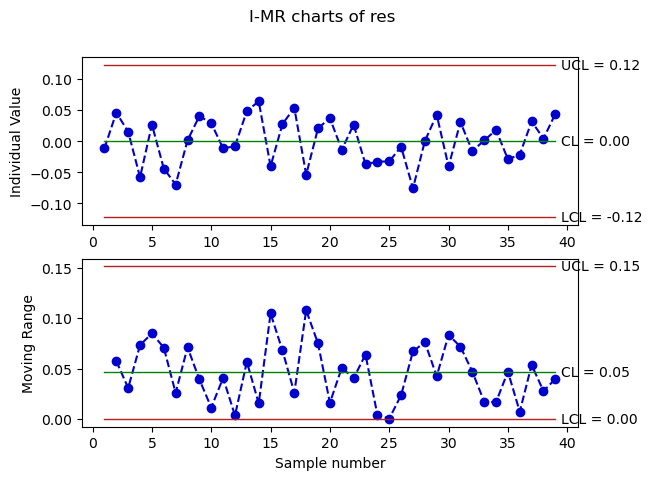

In [44]:
df_SCC = pd.DataFrame({'res': model.resid})
df_SCC = qda.ControlCharts.IMR(df_SCC, 'res')

>## point 3

In [49]:
print(model.params)

const    1.0044
lag1     0.6871
week     0.0033
dummy    0.2450
dtype: float64


In [64]:
data_predict = pd.DataFrame({'const': [1],'lag1': [df['Xbar'].iat[-1]], 'week': [41], 'dummy':[0] })

In [65]:
#predict the next value
prediction = model.predict(data_predict)
print('The predicted value is %.3f.' % (prediction[0]))

The predicted value is 3.654.


In [66]:
# Compute the fit, confidence intervals and prediction intervals
prediction_summary = model.get_prediction(data_predict).summary_frame(alpha=0.05)
print(prediction_summary)

     mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  3.6537   0.0131         3.6271         3.6802         3.571        3.7364
